# Deadly Visualizations!!!

![Image](../images/viz_types_portada.png)

## Setup

First we need to create a basic setup which includes:

- Importing the libraries.

- Reading the dataset file (source [Instituto Nacional de Estadística](https://www.ine.es/ss/Satellite?L=es_ES&c=Page&cid=1259942408928&p=1259942408928&pagename=ProductosYServicios%2FPYSLayout)).

- Create a couple of columns and tables for the analysis.

__NOTE:__ some functions were already created in order to help you go through the challenge. However, feel free to perform any code you might need.

In [74]:
# imports

import sys
import re
sys.path.insert(0, "../modules")

import numpy as np
import pandas as pd

import plotly.express as px
import cufflinks as cf
cf.go_offline()

import module as mod     # functions are include in module.py

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# read dataset

deaths = pd.read_csv('../data/7947.csv', sep=';', thousands='.')

deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [42]:
# add some columns...you'll need them later

deaths['cause_code'] = deaths['Causa de muerte'].apply(mod.cause_code)
deaths['cause_group'] = deaths['Causa de muerte'].apply(mod.cause_types)
deaths['cause_name'] = deaths['Causa de muerte'].apply(mod.cause_name)

deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
 5   cause_code       301158 non-null  object
 6   cause_group      301158 non-null  object
 7   cause_name       301158 non-null  object
dtypes: int64(2), object(6)
memory usage: 18.4+ MB


In [43]:
deaths.head()

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830,001-102,Multiple causes,I-XXII.Todas las causas


In [44]:
# lets check the categorical variables

var_list = ['Sexo', 'Edad', 'Periodo', 'cause_code', 'cause_name', 'cause_group']

categories = mod.cat_var(deaths, var_list)
categories

,categorical_variable,number_of_possible_values,values
0,cause_code,117,"[001-102, 001-008, 001, 002, 003, 004, 005, 00..."
1,cause_name,117,"[I-XXII.Todas las causas, I.Enfermedades infec..."
2,Periodo,39,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201..."
3,Edad,22,"[Todas las edades, Menos de 1 año, De 1 a 4 añ..."
4,Sexo,3,"[Total, Hombres, Mujeres]"
5,cause_group,2,"[Multiple causes, Single cause]"


In [45]:
# we need also to create a causes table for the analysis

causes_table = deaths[['cause_code', 'cause_name']].drop_duplicates().sort_values(by='cause_code').reset_index(drop=True)

causes_table

,cause_code,cause_name
0,001,Enfermedades infecciosas intestinales
1,001-008,I.Enfermedades infecciosas y parasitarias
2,001-102,I-XXII.Todas las causas
3,002,Tuberculosis y sus efectos tardíos
4,003,Enfermedad meningocócica
...,...,...
112,098,Suicidio y lesiones autoinfligidas
113,099,Agresiones (homicidio)
114,100,Eventos de intención no determinada
115,101,Complicaciones de la atención médica y quirúrgica


In [46]:
# And some space for free-style Pandas!!! (e.g.: df['column_name'].unique())

deaths['Total'].unique()

array([427721, 424523, 410611, ...,   3037,   2666,   2676], dtype=int64)

In [47]:
deaths['Sexo'].unique()

array(['Total', 'Hombres', 'Mujeres'], dtype=object)

In [48]:
deaths['Causa de muerte'].unique()

array(['001-102  I-XXII.Todas las causas',
       '001-008  I.Enfermedades infecciosas y parasitarias',
       '001  Enfermedades infecciosas intestinales',
       '002  Tuberculosis y sus efectos tardíos',
       '003  Enfermedad meningocócica', '004  Septicemia',
       '005  Hepatitis vírica', '006  SIDA',
       '007  VIH+ (portador, evidencias de laboratorio del VIH, ...)',
       '008  Resto de enfermedades infecciosas y parasitarias y sus efectos tardíos',
       '009-041  II.Tumores',
       '009  Tumor maligno del labio, de la cavidad bucal y de la faringe',
       '010  Tumor maligno del esófago',
       '011  Tumor maligno del estómago', '012  Tumor maligno del colon',
       '013  Tumor maligno del recto, de la porción rectosigmoide y del ano',
       '014  Tumor maligno del hígado y vías biliares intrahepáticas',
       '015  Tumor maligno del páncreas',
       '016  Otros tumores malignos digestivos',
       '017  Tumor maligno de la laringe',
       '018  Tumor maligno d

In [49]:
len(deaths['Causa de muerte'].unique())

117

In [61]:
major_cause = deaths['Causa de muerte'].value_counts().idxmax()
major_cause

'001-102  I-XXII.Todas las causas'

In [87]:
# Filter the data for the desired cause of death
desired_cause = '001-102 I-XXII.Todas las causas'
filtered_data = cleaned_data.loc[cleaned_data['Causa de muerte'] == desired_cause]
filtered_data

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name


In [62]:
cleaned_data = deaths.drop_duplicates()
cleaned_data

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830,001-102,Multiple causes,I-XXII.Todas las causas
...,...,...,...,...,...,...,...,...
301153,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1984,0,102,Single cause,Otras causas externas y sus efectos tardíos
301154,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1983,0,102,Single cause,Otras causas externas y sus efectos tardíos
301155,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1982,0,102,Single cause,Otras causas externas y sus efectos tardíos
301156,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1981,0,102,Single cause,Otras causas externas y sus efectos tardíos


In [64]:
cleaned_data = deaths.drop_duplicates(subset=['Causa de muerte'])
cleaned_data

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
2574,001-008 I.Enfermedades infecciosas y parasita...,Total,Todas las edades,2018,6398,001-008,Multiple causes,I.Enfermedades infecciosas y parasitarias
5148,001 Enfermedades infecciosas intestinales,Total,Todas las edades,2018,1037,001,Single cause,Enfermedades infecciosas intestinales
7722,002 Tuberculosis y sus efectos tardíos,Total,Todas las edades,2018,249,002,Single cause,Tuberculosis y sus efectos tardíos
10296,003 Enfermedad meningocócica,Total,Todas las edades,2018,15,003,Single cause,Enfermedad meningocócica
...,...,...,...,...,...,...,...,...
288288,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,2018,3539,098,Single cause,Suicidio y lesiones autoinfligidas
290862,099 Agresiones (homicidio),Total,Todas las edades,2018,275,099,Single cause,Agresiones (homicidio)
293436,100 Eventos de intención no determinada,Total,Todas las edades,2018,74,100,Single cause,Eventos de intención no determinada
296010,101 Complicaciones de la atención médica y qu...,Total,Todas las edades,2018,347,101,Single cause,Complicaciones de la atención médica y quirúrgica


In [92]:
cleaned_data = cleaned_data.dropna()
cleaned_data

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
2574,001-008 I.Enfermedades infecciosas y parasita...,Total,Todas las edades,2018,6398,001-008,Multiple causes,I.Enfermedades infecciosas y parasitarias
5148,001 Enfermedades infecciosas intestinales,Total,Todas las edades,2018,1037,001,Single cause,Enfermedades infecciosas intestinales
7722,002 Tuberculosis y sus efectos tardíos,Total,Todas las edades,2018,249,002,Single cause,Tuberculosis y sus efectos tardíos
10296,003 Enfermedad meningocócica,Total,Todas las edades,2018,15,003,Single cause,Enfermedad meningocócica
...,...,...,...,...,...,...,...,...
288288,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,2018,3539,098,Single cause,Suicidio y lesiones autoinfligidas
290862,099 Agresiones (homicidio),Total,Todas las edades,2018,275,099,Single cause,Agresiones (homicidio)
293436,100 Eventos de intención no determinada,Total,Todas las edades,2018,74,100,Single cause,Eventos de intención no determinada
296010,101 Complicaciones de la atención médica y qu...,Total,Todas las edades,2018,347,101,Single cause,Complicaciones de la atención médica y quirúrgica


In [94]:
cleaned_data = cleaned_data.pivot(index = 'Periodo', columns = 'Causa de muerte', values = 'Sexo')
cleaned_data

Causa de muerte,001 Enfermedades infecciosas intestinales,001-008 I.Enfermedades infecciosas y parasitarias,001-102 I-XXII.Todas las causas,002 Tuberculosis y sus efectos tardíos,003 Enfermedad meningocócica,004 Septicemia,005 Hepatitis vírica,006 SIDA,"007 VIH+ (portador, evidencias de laboratorio del VIH, ...)",008 Resto de enfermedades infecciosas y parasitarias y sus efectos tardíos,...,"093 Ahogamiento, sumersión y sofocación accidentales","094 Accidentes por fuego, humo y sustancias calientes",095 Envenenamiento accidental por psicofármacos y drogas de abuso,096 Otros envenenamientos accidentales,097 Otros accidentes,098 Suicidio y lesiones autoinfligidas,099 Agresiones (homicidio),100 Eventos de intención no determinada,101 Complicaciones de la atención médica y quirúrgica,102 Otras causas externas y sus efectos tardíos
Periodo,,,,,,,,,,,,,,,,,,,,,
2018,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,...,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total


In [96]:
#cleaned_data.iplot(kind='line', xTitle='Year', yTitle='Cause', title='Graphics')

In [65]:
age_distribution = cleaned_data.groupby('Edad').size()
age_distribution

Edad
Todas las edades    117
dtype: int64

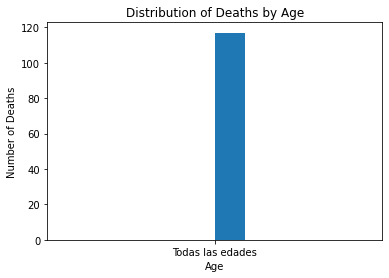

In [69]:
# plot the age distribution as a histogram
plt.hist(cleaned_data['Edad'], bins=10)
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.title('Distribution of Deaths by Age')
plt.show()

In [88]:
#infant_deaths = cleaned_data[cleaned_data['Edad'] < 1]  # filter infant deaths
#principal_cause = infant_deaths['Causa de muerte'].value_counts().idxmax()                                     

## Lets make some transformations

Eventhough the dataset is pretty clean, the information is completely denormalized as you could see. For that matter a collection of methods (functions) are available in order to generate the tables you might need:

- `row_filter(df, cat_var, cat_values)` => Filter rows by any value or group of values in a categorical variable.

- `nrow_filter(df, cat_var, cat_values)` => The same but backwards. 

- `groupby_sum(df, group_vars, agg_var='Total', sort_var='Total')` => Add deaths by a certain variable.

- `pivot_table(df, col, x_axis, value='Total')`=> Make some pivot tables, you might need them...

__NOTE:__ be aware that the filtering methods can perform a filter at a time. Feel free to perform the filter you need in any way you want or feel confortable with.

In [50]:
# Example 1
'''
dataset = mod.row_filter(deaths, 'Sexo', ['Total'])
dataset = mod.row_filter(dataset, 'Edad', ['Todas las edades'])
dataset.head()
'''

"\ndataset = mod.row_filter(deaths, 'Sexo', ['Total'])\ndataset = mod.row_filter(dataset, 'Edad', ['Todas las edades'])\ndataset.head()\n"

In [51]:
dataset = mod.row_filter(deaths, 'Sexo', ['Hombres','Mujeres'])
dataset

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2018,216442,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2017,214236,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2015,213309,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2018,211279,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2017,210287,001-102,Multiple causes,I-XXII.Todas las causas
...,...,...,...,...,...,...,...,...
200767,027 Tumores malignos de otros órganos genital...,Hombres,De 65 a 69 años,1983,0,027,Single cause,Tumores malignos de otros órganos genitales fe...
200768,027 Tumores malignos de otros órganos genital...,Hombres,De 65 a 69 años,1984,0,027,Single cause,Tumores malignos de otros órganos genitales fe...
200769,078 Enfermedades de los órganos genitales mas...,Hombres,De 55 a 59 años,1989,0,078,Single cause,Enfermedades de los órganos genitales masculinos
200770,027 Tumores malignos de otros órganos genital...,Hombres,De 65 a 69 años,1985,0,027,Single cause,Tumores malignos de otros órganos genitales fe...


In [52]:
dataset = mod.row_filter(dataset, 'Edad', ['Todas las edades'])
dataset 

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2018,216442,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2017,214236,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2015,213309,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2018,211279,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2017,210287,001-102,Multiple causes,I-XXII.Todas las causas
...,...,...,...,...,...,...,...,...
9121,"081 XV.Embarazo, parto y puerperio",Hombres,Todas las edades,2015,0,081,Single cause,"XV.Embarazo, parto y puerperio"
9122,"081 XV.Embarazo, parto y puerperio",Hombres,Todas las edades,1987,0,081,Single cause,"XV.Embarazo, parto y puerperio"
9123,"081 XV.Embarazo, parto y puerperio",Hombres,Todas las edades,1988,0,081,Single cause,"XV.Embarazo, parto y puerperio"
9124,"081 XV.Embarazo, parto y puerperio",Hombres,Todas las edades,1989,0,081,Single cause,"XV.Embarazo, parto y puerperio"


In [53]:
# Example 2
'''
group = ['cause_code','Periodo']
dataset = mod.groupby_sum(deaths, group)
dataset.head()
'''

"\ngroup = ['cause_code','Periodo']\ndataset = mod.groupby_sum(deaths, group)\ndataset.head()\n"

In [54]:
group = ['cause_code','Periodo']
group

['cause_code', 'Periodo']

In [55]:
dataset = mod.groupby_sum(deaths, group)
dataset

,cause_code,Periodo,Total
0,001-102,2018,1710884
1,001-102,2017,1698092
2,001-102,2015,1690272
3,001-102,2016,1642444
4,001-102,2012,1611800
...,...,...,...
4558,007,2015,0
4559,007,2016,0
4560,007,2017,0
4561,007,2018,0


In [56]:
grouped_data = deaths.groupby(['Causa de muerte']).size().reset_index(name='count')
grouped_data

,Causa de muerte,count
0,001 Enfermedades infecciosas intestinales,2574
1,001-008 I.Enfermedades infecciosas y parasita...,2574
2,001-102 I-XXII.Todas las causas,2574
3,002 Tuberculosis y sus efectos tardíos,2574
4,003 Enfermedad meningocócica,2574
...,...,...
112,098 Suicidio y lesiones autoinfligidas,2574
113,099 Agresiones (homicidio),2574
114,100 Eventos de intención no determinada,2574
115,101 Complicaciones de la atención médica y qu...,2574


In [57]:
# Example 3
'''
dataset = mod.pivot_table(dataset, 'cause_code', 'Periodo')
dataset.head()
'''

"\ndataset = mod.pivot_table(dataset, 'cause_code', 'Periodo')\ndataset.head()\n"

In [58]:
dataset = mod.pivot_table(dataset, 'cause_code', 'Periodo')
dataset.head()

cause_code,Periodo,001,001-008,001-102,002,003,004,005,006,007,...,093,094,095,096,097,098,099,100,101,102
0,1980,1620,15768,1157376,5904,2008,3448,436,0,0,...,4956,1432,184,692,16748,6608,1496,28,968,96
1,1981,1404,15124,1173544,6332,1656,3344,348,0,0,...,4700,1200,156,1396,17472,6872,1284,336,908,208
2,1982,1308,13488,1146620,5352,1240,3104,316,0,0,...,4864,956,200,1000,18616,7404,1228,440,1132,52
3,1983,1212,13100,1210276,5152,1072,3152,336,0,0,...,4788,1464,148,884,18392,8724,1560,1276,1500,56
4,1984,1228,12928,1197636,4564,964,3704,424,0,0,...,4716,1244,164,1020,14696,9972,1812,1144,1636,76


## ...and finally, show me some insights with Plotly!!!

In [59]:
# Cufflinks histogram
'''
dataset_column.iplot(kind='hist',
                     title='VIZ TITLE',
                     yTitle='AXIS TITLE',
                     xTitle='AXIS TITLE')
'''

"\ndataset_column.iplot(kind='hist',\n                     title='VIZ TITLE',\n                     yTitle='AXIS TITLE',\n                     xTitle='AXIS TITLE')\n"

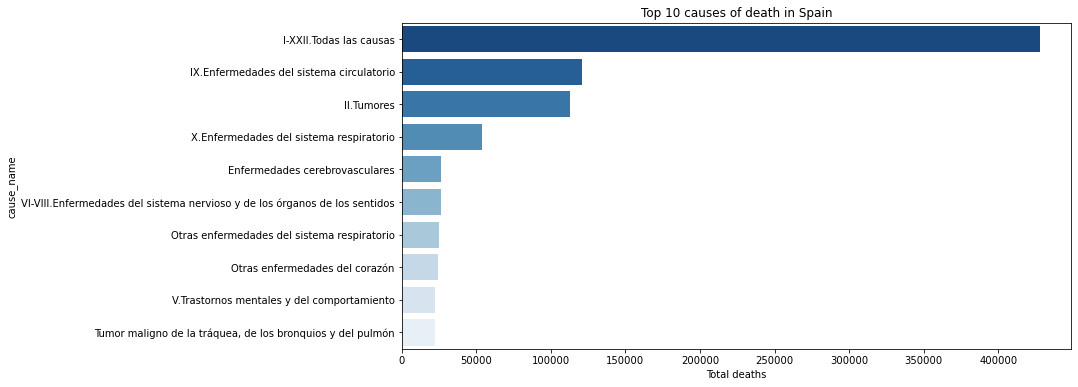

In [75]:
# Plot the top 10 causes of death in Spain
top10_causes = cleaned_data.groupby('cause_name')['Total'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top10_causes.values, y=top10_causes.index, palette='Blues_r')
plt.xlabel('Total deaths')
plt.title('Top 10 causes of death in Spain')
plt.show()

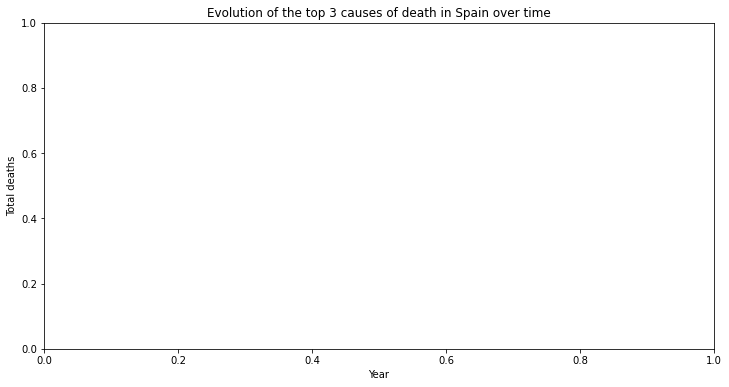

In [76]:
# Plot the evolution of the top 3 causes of death in Spain over time
top3_causes = cleaned_data[cleaned_data['cause_name'].isin(['Diseases of the circulatory system', 'Malignant neoplasms', 'External causes of morbidity and mortality'])]
plt.figure(figsize=(12,6))
sns.lineplot(x='Periodo', y='Total', hue='cause_name', data=top3_causes)
plt.xlabel('Year')
plt.ylabel('Total deaths')
plt.title('Evolution of the top 3 causes of death in Spain over time')
plt.show()

In [83]:
# Group the data by sex and calculate the total deaths
total_deaths_by_sex = cleaned_data.groupby(['Periodo', 'Sexo'])['Total'].sum().reset_index()

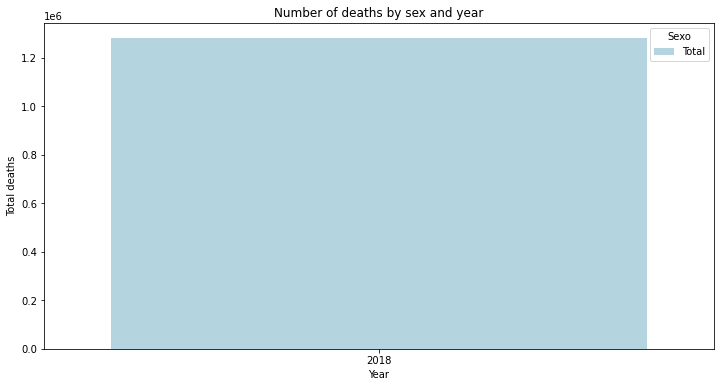

In [84]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Periodo', y='Total', hue='Sexo', data=total_deaths_by_sex, palette=['lightblue', 'pink'])
plt.xlabel('Year')
plt.ylabel('Total deaths')
plt.title('Number of deaths by sex and year')
plt.show()

In [ ]:
# Cufflinks bar plot
'''
dataset_bar.iplot(kind='bar',
                  x='VARIABLE',
                  xTitle='AXIS TITLE',
                  yTitle='AXIS TITLE',
                  title='VIZ TITLE')
'''

In [ ]:
# Cufflinks line plot
'''
dataset_line.iplot(kind='line',
                   x='VARIABLE',
                   xTitle='AXIS TITLE',
                   yTitle='AXIS TITLE',
                   title='VIZ TITLE')
'''

In [ ]:
# Cufflinks scatter plot
'''
dataset_scatter.iplot(x='VARIABLE', 
                      y='VARIABLE', 
                      categories='VARIABLE',
                      xTitle='AXIS TITLE', 
                      yTitle='AXIS TITLE',
                      title='VIZ TITLE')
'''